# 6.1. -  Regressions

Machine learning model implementation

In [1]:
#Libraries utilized dataframes pandas, arrays numpy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#modeling Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#scatter plot
import matplotlib.pyplot as plt
from pandasgui import show


### Loading the reduced dataset

In [2]:
#Loading from the previously processed dataframe
population_data_origin  = pd.read_csv('datasets/population_merged_reduced.csv',  sep=",",low_memory=False)

# Display the DataFrame information including data types
population_data_origin.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       17538 non-null  int64  
 1   LocID            17538 non-null  int64  
 2   Time             17538 non-null  int64  
 3   TPopulation1Jan  17538 non-null  float64
 4   PopDensity       17538 non-null  float64
 5   PopSexRatio      17538 non-null  float64
 6   MedianAgePop     17538 non-null  float64
 7   PopGrowthRate    17538 non-null  float64
 8   DoublingTime     17538 non-null  float64
 9   MAC              17538 non-null  float64
 10  SRB              17538 non-null  float64
 11  CDR              17538 non-null  float64
 12  NetMigrations    17538 non-null  float64
 13  Location         17538 non-null  object 
dtypes: float64(10), int64(3), object(1)
memory usage: 1.9+ MB


In [3]:
#Deleting first attribute garbage generated
population_data_origin = population_data_origin.iloc[:, 1:]

#show the dataframe
population_data_origin.head()


,LocID,Time,TPopulation1Jan,PopDensity,PopSexRatio,MedianAgePop,PopGrowthRate,DoublingTime,MAC,SRB,CDR,NetMigrations,Location
0,108,1950,2229.322,86.8637,91.9472,18.3147,2.200,31.5067,30.995,102.5,23.546,-13.343,Burundi
1,108,1951,2278.903,88.7571,92.1448,18.0842,2.114,32.7884,30.996,102.5,23.879,-13.217,Burundi
2,108,1952,2327.593,90.6179,92.3191,17.8744,2.036,34.0446,31.026,102.5,23.815,-13.715,Burundi
3,108,1953,2375.478,92.4508,92.4880,17.6693,1.969,35.2030,31.030,102.5,23.604,-14.962,Burundi
4,108,1954,2422.721,94.2874,92.6503,17.4706,1.965,35.2747,31.036,102.5,23.347,-14.599,Burundi


In [4]:
# For modeling we do not need the location name varchar type
population_data =  population_data_origin.drop("Location", axis='columns')

In [5]:
population_data.head()


,LocID,Time,TPopulation1Jan,PopDensity,PopSexRatio,MedianAgePop,PopGrowthRate,DoublingTime,MAC,SRB,CDR,NetMigrations
0,108,1950,2229.322,86.8637,91.9472,18.3147,2.200,31.5067,30.995,102.5,23.546,-13.343
1,108,1951,2278.903,88.7571,92.1448,18.0842,2.114,32.7884,30.996,102.5,23.879,-13.217
2,108,1952,2327.593,90.6179,92.3191,17.8744,2.036,34.0446,31.026,102.5,23.815,-13.715
3,108,1953,2375.478,92.4508,92.4880,17.6693,1.969,35.2030,31.030,102.5,23.604,-14.962
4,108,1954,2422.721,94.2874,92.6503,17.4706,1.965,35.2747,31.036,102.5,23.347,-14.599


## Applying Modeling Regression algorithms

Part of the questions I may need to ask involve my dependent variable, which is population size. However, I am specifically interested in making predictions based on years and country codes. While regression analysis is suitable for this task, I am also considering other algorithms to explore alternative approaches.

## Splitting the data in train and test sets by stratifying with a  Composite Primary Index ( CountryId, Year )

In [6]:
# Separate the independent variables (attributes) and the dependent variable
X = population_data.drop('TPopulation1Jan', axis=1)  # The dependent variable dropped
y = population_data['TPopulation1Jan']  # y for the dependent variable

# Assuming 'primary_key_values' is a list of primary key values for each record
primary_key_values = list(zip(population_data['LocID'], population_data['Time']))

# Assuming 'train_primary_key_values' is a list of primary key values for the training set
train_primary_key_values = list(set(zip(population_data['LocID'], population_data['Time'])))

# Create a boolean mask to identify the indices that belong to the training set
train_indices = [pk in train_primary_key_values for pk in primary_key_values]

# Split the data into training and test sets based on the indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=train_indices)

###  Simple Linear Regression
is a statistical modeling technique used to analyze the relationship between multiple independent variables (also known as predictors or features) and a single continuous dependent variable. It extends the concept of simple linear regression, which considers only one independent variable, to incorporate multiple predictors.

In [7]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# #model to accomodate the full set of initial testing
y_pred = model.predict(X_test)

print("Multiple linear regression Evaluation:  ")

# - R-squared (R2) Score: Measures the proportion of variance in the dependent variable explained by the model.
r2 = r2_score(y_test, y_pred )
print("R-squared (R2) Score:  ", r2)
print("" )
print("The model only have ", r2, " is not performing well  only ", (f"{r2/100:.2%}") ,"% in percentage terms.")


Multiple linear regression Evaluation:  
R-squared (R2) Score:   0.06279830151164367

The model only have  0.06279830151164367  is not performing well  only  0.06% % in percentage terms.


### Polynomial Regression Results:
Polynomial regression the type in which the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. By fitting a polynomial curve to the data, polynomial regression can capture nonlinear relationships between the variables.

In [8]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=4)  # Change the degree as needed
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict the response for train and test sets
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Polynomial Regression Evaluation:  ")
print("Train RMSE:", train_rmse)
print("Train R^2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)
print(" ")
print("The Polynomial Regression R^2:", test_r2, " is not performing well. Only ",(f"{r2/100:.2%}"),"% percent ")


Polynomial Regression Evaluation:  
Train RMSE: 38684.28170639233
Train R^2: 0.8354667992369833
Test RMSE: 4976791.848485227
Test R^2: -2811.7745480267145
 
The Polynomial Regression R^2: -2811.7745480267145  is not performing well. Only  0.06% % percent 


### Random Forest Regression
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It can handle non-linear relationships and interactions between variables.

In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest - Train R^2:", train_r2_rf)
print("Random Forest - Test R^2:", test_r2_rf)


Random Forest - Train R^2: 0.9855033891660968
Random Forest - Test R^2: 0.8378069954034717


### Gradient Boosting Regression

Ensemble method that combines weak prediction models into a strong predictor. It iteratively builds a sequence of models to correct the mistakes made by the previous models, leading to improved performance.

In [11]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print("Gradient Boosting - Train R^2:", train_r2_gb)
print("Gradient Boosting - Test R^2:", test_r2_gb)

Gradient Boosting - Train R^2: 0.9210088706064007
Gradient Boosting - Test R^2: 0.8373266884850991


### Neural Network Regression

Neural networks, particularly deep learning models, can capture complex relationships between variables and learn intricate patterns from the data. They are highly flexible and have the potential to achieve high accuracy but may require more data and computational resources.

In [12]:
# Neural Network Regression
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
y_train_pred_nn = nn_model.predict(X_train)
y_test_pred_nn = nn_model.predict(X_test)
train_r2_nn = r2_score(y_train, y_train_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print("Neural Network Regression - Train R^2:", train_r2_nn)
print("Neural Network Regression - Test R^2:", test_r2_nn)

Neural Network Regression - Train R^2: 0.19014501411429263
Neural Network Regression - Test R^2: 0.04398702724690562


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Support Vector Regression

Support Vector Regression (SVR) is a supervised learning algorithm that can handle both linear and non-linear regression tasks. It uses support vectors to define a decision boundary and aims to minimize the error between the predicted and actual values.

In [13]:
# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_train_pred_svr = svr_model.predict(X_train)
y_test_pred_svr = svr_model.predict(X_test)
train_r2_svr = r2_score(y_train, y_train_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

print("Support Vector Regression - Train R^2:", train_r2_svr)
print("Support Vector Regression - Test R^2:", test_r2_svr)

Support Vector Regression - Train R^2: -0.03718941052874958
Support Vector Regression - Test R^2: -0.03320311845791735


## Plotting the best 2 models by each independent variables

### Random forest model

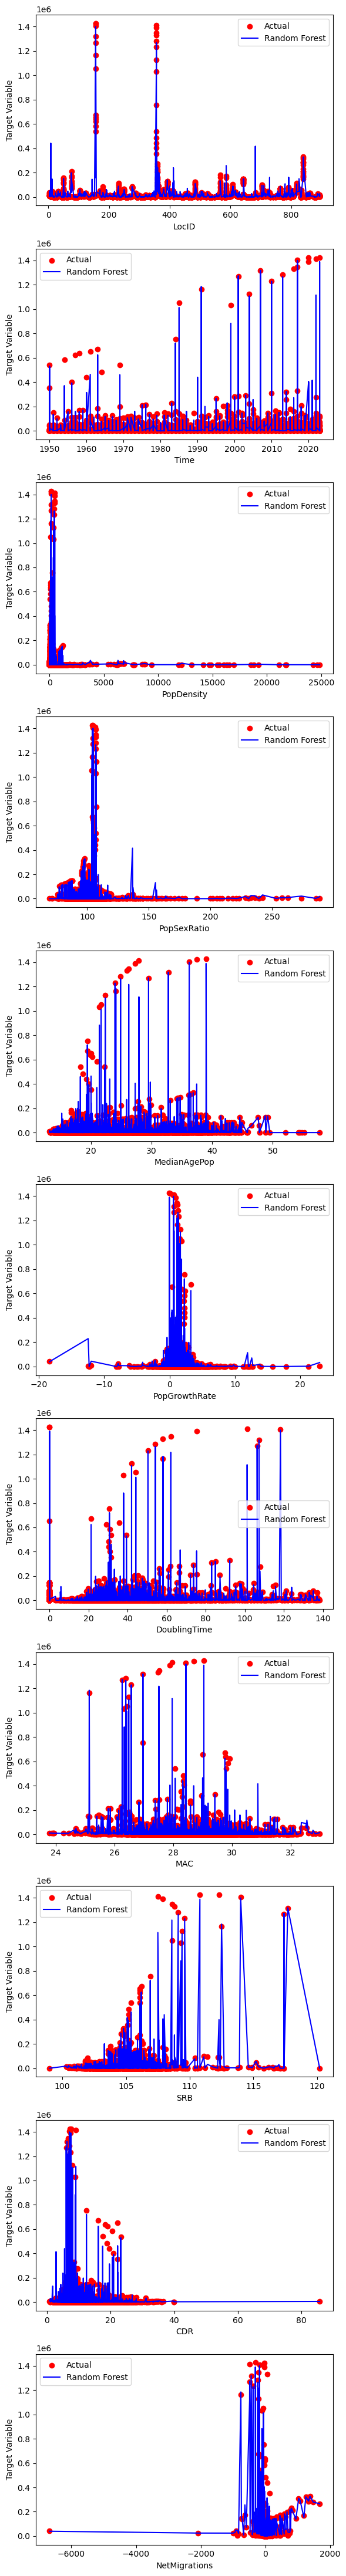

In [15]:

# Plotting the predictions against the actual values for each model
num_plots = X_test.shape[1]
fig, axs = plt.subplots(num_plots, 1, figsize=(6, 4*num_plots))

for i, feature_name in enumerate(X_test.columns):
    # Sort the feature values
    sorted_indices = np.argsort(X_test[feature_name])
    sorted_feature = X_test[feature_name].iloc[sorted_indices]
    
    # Plot the feature curve for Random Forest model
    axs[i].scatter(sorted_feature, y_test.iloc[sorted_indices], color='red', label='Actual')
    axs[i].plot(sorted_feature, y_test_pred_rf[sorted_indices], color='blue', label='Random Forest')
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()



### Gradient Boosting model

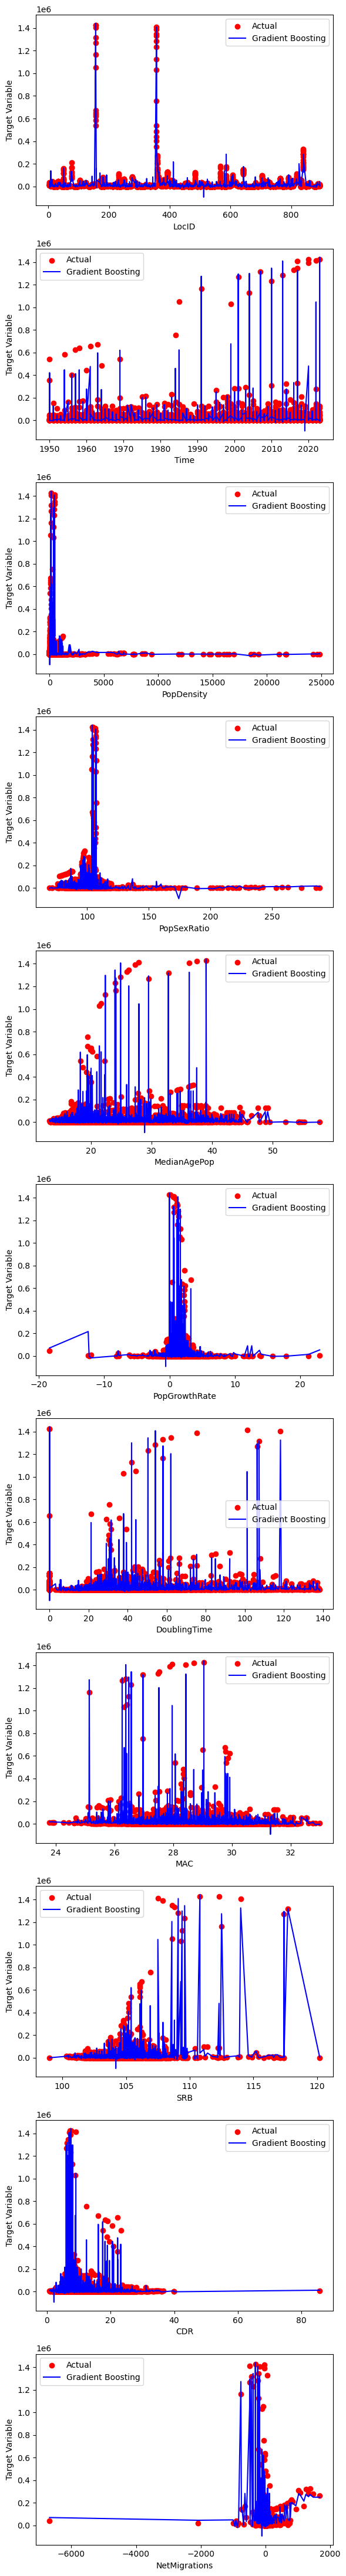

In [16]:
# Plotting the predictions against the actual values for Gradient Boosting model
fig, axs = plt.subplots(num_plots, 1, figsize=(6, 4*num_plots))

for i, feature_name in enumerate(X_test.columns):
    # Sort the feature values
    sorted_indices = np.argsort(X_test[feature_name])
    sorted_feature = X_test[feature_name].iloc[sorted_indices]
    
    # Plot the feature curve for Gradient Boosting model
    axs[i].scatter(sorted_feature, y_test.iloc[sorted_indices], color='red', label='Actual')
    axs[i].plot(sorted_feature, y_test_pred_gb[sorted_indices], color='blue', label='Gradient Boosting')
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Target Variable')
    axs[i].legend()

plt.tight_layout()
plt.show()

#### QUANTILE DISCRETIZATION :For better understanding of the data, and to achieve better I am applying the preprocessing technique quantile discretization that divides a continuous variable into a specified number of bins or intervals based on the quantiles of the data distribution

In [ ]:
#process of discretization
num_bins = 5
population_data['quantile'] = pd.qcut(population_data_origin['TPopulation1Jan'], num_bins, labels=False)

### Long Short-Term Memory (LSTM) Networks: 
 
LSTM is a type of recurrent neural network (RNN) that can effectively model and predict sequences, including time series data. LSTM networks can capture long-term dependencies and are commonly used for time series forecasting tasks.



In [ ]:
# Separate the independent variables (attributes) and the dependent variable
X = population_data.drop('TPopulation1Jan', axis=1)  # Replace 'TPopulation1Jan' with the column name of your dependent variable
y = population_data['TPopulation1Jan']  # Replace 'TPopulation1Jan' with the column name of your dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data to fit the LSTM input shape [samples, time steps, features]
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)


print("Test Loss:", loss)

In [ ]:

# Data prepared in the following format:
# X_train: Training features (input sequence)
# y_train: Training labels (output/target)
# X_test: Test features (input sequence)
# y_test: Test labels (output/target)

# Reshape input data to fit the LSTM input shape [samples, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# Create the LSTM model
model = Sequential()
#model.add(LSTM(units=50, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
